<a href="https://colab.research.google.com/github/khoay/IC-Team50/blob/main/FFMin_and_FFMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
file_path = 'FF_SR_ data.csv'
df = pd.read_csv(file_path)
print(df)

      FF_NDB  SR_NDB  food_category_id    FF Food description  \
0      16158   16158                16     Hummus, commercial   
1      16158   16158                16     Hummus, commercial   
2      16158   16158                16     Hummus, commercial   
3      16158   16158                16     Hummus, commercial   
4      16158   16158                16     Hummus, commercial   
...      ...     ...               ...                    ...   
4390    1267    1267                 1  Cheese, cotija, solid   
4391    1267    1267                 1  Cheese, cotija, solid   
4392    1267    1267                 1  Cheese, cotija, solid   
4393    1267    1267                 1  Cheese, cotija, solid   
4394    1267    1267                 1  Cheese, cotija, solid   

                SR Food description  Nutrient_id   rank  \
0                Hummus, commercial         1090   5500   
1                Hummus, commercial         1258   9700   
2                Hummus, commercial       

In [3]:
# df.fillna(0, inplace=True)
df.dropna(subset=['FF Min', 'FF Max'], inplace=True)
print(df)

      FF_NDB  SR_NDB  food_category_id    FF Food description  \
0      16158   16158                16     Hummus, commercial   
2      16158   16158                16     Hummus, commercial   
3      16158   16158                16     Hummus, commercial   
4      16158   16158                16     Hummus, commercial   
7      16158   16158                16     Hummus, commercial   
...      ...     ...               ...                    ...   
4390    1267    1267                 1  Cheese, cotija, solid   
4391    1267    1267                 1  Cheese, cotija, solid   
4392    1267    1267                 1  Cheese, cotija, solid   
4393    1267    1267                 1  Cheese, cotija, solid   
4394    1267    1267                 1  Cheese, cotija, solid   

                SR Food description  Nutrient_id   rank      FF_Component  \
0                Hummus, commercial         1090   5500     Magnesium, Mg   
2                Hummus, commercial         1089   5400          

In [4]:
df['FF Publication Date'] = pd.to_datetime(df['FF Publication Date'], errors='coerce')
df_2019 = df[df['FF Publication Date'].dt.year == 2019]
print(df_2019)

      FF_NDB  SR_NDB  food_category_id              FF Food description  \
0      16158   16158                16               Hummus, commercial   
2      16158   16158                16               Hummus, commercial   
3      16158   16158                16               Hummus, commercial   
4      16158   16158                16               Hummus, commercial   
7      16158   16158                16               Hummus, commercial   
...      ...     ...               ...                              ...   
1705    1123    1123                 1  Eggs, Grade A, Large, egg whole   
1709    1123    1123                 1  Eggs, Grade A, Large, egg whole   
1710    1123    1123                 1  Eggs, Grade A, Large, egg whole   
1711    1123    1123                 1  Eggs, Grade A, Large, egg whole   
1712    1123    1123                 1  Eggs, Grade A, Large, egg whole   

         SR Food description  Nutrient_id   rank      FF_Component  \
0         Hummus, commercial 

In [5]:
counter = 0

not_between_df = pd.DataFrame(columns=df.columns)

# Iterate through each row
for index, row in df.iterrows():
    if row['FF Min'] <= row['SR Mean per 100g'] <= row['FF Max']:
        counter += 1
    else:
        # Append rows not between FF Min and FF Max to the new DataFrame
        not_between_df = not_between_df.append(row, ignore_index=True)

num_rows = df.shape[0]
# Display the counter value
print(f"The number of rows where SR Mean is between FF Min and FF Max is: {counter} out of {num_rows}")

# Display the new DataFrame with rows not between FF Min and FF Max
print("\nRows not between FF Min and FF Max:")
print(not_between_df)
output_file_path = 'not_between_FFMin_&_FFMax_df.csv'
not_between_df.to_csv(output_file_path, index=False)

#the number of rows with no value for FFMin/FFMax is 1849 - 1337

The number of rows where SR Mean is between FF Min and FF Max is: 2506 out of 3842

Rows not between FF Min and FF Max:
     FF_NDB SR_NDB food_category_id    FF Food description  \
0     16158  16158               16     Hummus, commercial   
1     16158  16158               16     Hummus, commercial   
2     16158  16158               16     Hummus, commercial   
3     16158  16158               16     Hummus, commercial   
4     16158  16158               16     Hummus, commercial   
...     ...    ...              ...                    ...   
1331   1267   1267                1  Cheese, cotija, solid   
1332   1267   1267                1  Cheese, cotija, solid   
1333   1267   1267                1  Cheese, cotija, solid   
1334   1267   1267                1  Cheese, cotija, solid   
1335   1267   1267                1  Cheese, cotija, solid   

                SR Food description Nutrient_id   rank  \
0                Hummus, commercial        1051    100   
1                Hu

In [6]:
not_between_df['FF Publication Date'] = pd.to_datetime(not_between_df['FF Publication Date'])
not_between_df_2019 = not_between_df[not_between_df['FF Publication Date'].dt.year == 2019]

not_between_df_2020 = not_between_df[not_between_df['FF Publication Date'].dt.year == 2020]
not_between_df_2021 = not_between_df[not_between_df['FF Publication Date'].dt.year == 2021]
not_between_df_2022 = not_between_df[not_between_df['FF Publication Date'].dt.year == 2022]
not_between_df_2023 = not_between_df[not_between_df['FF Publication Date'].dt.year == 2023]




print(not_between_df_2019)


    FF_NDB SR_NDB food_category_id              FF Food description  \
0    16158  16158               16               Hummus, commercial   
1    16158  16158               16               Hummus, commercial   
2    16158  16158               16               Hummus, commercial   
3    16158  16158               16               Hummus, commercial   
4    16158  16158               16               Hummus, commercial   
..     ...    ...              ...                              ...   
337   1123   1123                1  Eggs, Grade A, Large, egg whole   
338   1123   1123                1  Eggs, Grade A, Large, egg whole   
339   1123   1123                1  Eggs, Grade A, Large, egg whole   
340   1123   1123                1  Eggs, Grade A, Large, egg whole   
341   1123   1123                1  Eggs, Grade A, Large, egg whole   

        SR Food description Nutrient_id   rank          FF_Component  \
0        Hummus, commercial        1051    100                 Water   
1  

In [7]:
category_mapping = {
    1: 'Dairy and Egg Products',
    2: 'Spices and Herbs',
    3: 'Baby Foods',
    4: 'Fats and Oils',
    5: 'Poultry Products',
    6: 'Soups Sauces, and  ',
    7: 'Sausages and Lunch Meat',
    8: 'Breakfast Cerals',
    9: 'Fruits and Fruit Juices',
    10: 'Pork Products',
    11: 'Vegatables and Veatables Juices',
    12: 'Nut and Seed Products',
    13: 'Beef Products',
    14: 'Beverages',
    15: 'Finfish and Shellfish',
    16: 'Legumes and Legumes',
    17: 'Lamb, Veal, and Game Products',
    18: 'Baked Products',
    19: 'Sweets',
    20: 'Cereal Grains and '
}
df_2019['food_category_id'] = df_2019['food_category_id'].replace(category_mapping)
print(df_2019)

      FF_NDB  SR_NDB        food_category_id              FF Food description  \
0      16158   16158     Legumes and Legumes               Hummus, commercial   
2      16158   16158     Legumes and Legumes               Hummus, commercial   
3      16158   16158     Legumes and Legumes               Hummus, commercial   
4      16158   16158     Legumes and Legumes               Hummus, commercial   
7      16158   16158     Legumes and Legumes               Hummus, commercial   
...      ...     ...                     ...                              ...   
1705    1123    1123  Dairy and Egg Products  Eggs, Grade A, Large, egg whole   
1709    1123    1123  Dairy and Egg Products  Eggs, Grade A, Large, egg whole   
1710    1123    1123  Dairy and Egg Products  Eggs, Grade A, Large, egg whole   
1711    1123    1123  Dairy and Egg Products  Eggs, Grade A, Large, egg whole   
1712    1123    1123  Dairy and Egg Products  Eggs, Grade A, Large, egg whole   

         SR Food descriptio

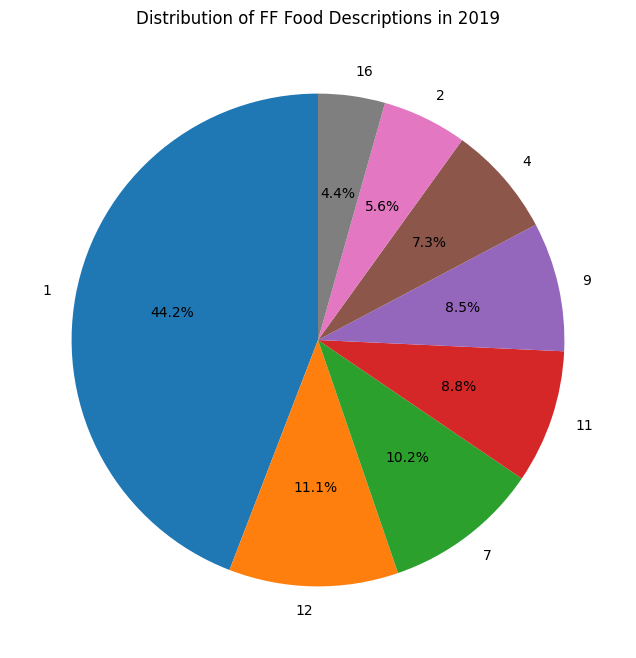

In [8]:
food_description_counts = not_between_df_2019['food_category_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(food_description_counts, labels=food_description_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FF Food Descriptions in 2019')
plt.show()


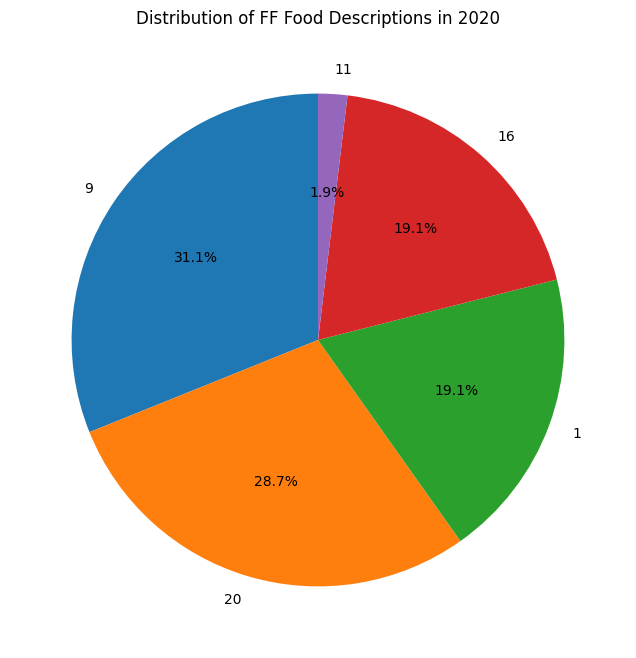

In [9]:
food_description_counts = not_between_df_2020['food_category_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(food_description_counts, labels=food_description_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FF Food Descriptions in 2020')
plt.show()

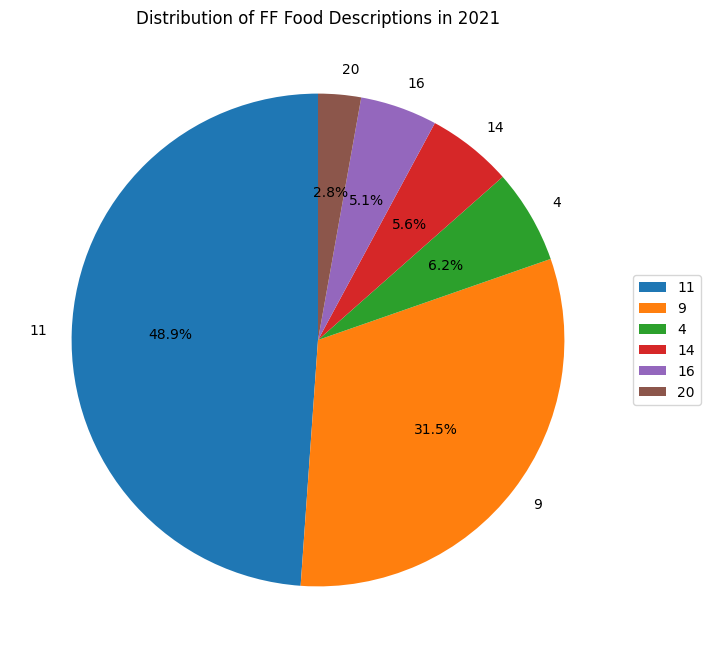

In [10]:
food_description_counts = not_between_df_2021['food_category_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(food_description_counts, labels=food_description_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FF Food Descriptions in 2021')
plt.legend(food_description_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))  # Add a legend to the right of the chart
plt.show()